# FIXME Jupyter Notebooks Primer

# FIXME The Data

In [5]:
import pandas as pd
# load the csv file as pandas dataframe
df = pd.read_csv("sample_matrix_clean.csv")#_m-5-75.csv")

In [6]:
# display the dataframe
df

,ID,Gender,Status,site-1,site-2,site-3,site-4,site-5,site-6,site-7,...,site-91,site-92,site-93,site-94,site-95,site-96,site-97,site-98,site-99,site-100
0,sample-1,2,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,sample-2,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,sample-3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,sample-4,3,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,sample-5,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,sample-6,3,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,sample-7,3,1,0,0,1,0,2,2,0,...,1,0,0,0,0,0,0,0,0,0
7,sample-8,2,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
8,sample-9,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,sample-10,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [7]:
# Remove columns that don't go into AutoML as features but keep a copy
annotation = df[["ID", "Status", "Gender"]].copy()
df = df.drop(["ID", "Status"], axis=1)


In [8]:
# Split into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df, annotation['Status'], test_size=0.2, random_state=42)


# AutoML run (local)


A very cool feature in AutoML is automatic preprocessing (see `preprocess` below), which can automatically impute missing values, encode values, add features, embed words etc. See [here](https://docs.microsoft.com/en-us/azure/machine-learning/service/how-to-create-portal-experiments#preprocess) for more information. Since the data-set here is clean already, there is no need for this. Plus, I couldn't get the Explainer below to work if preprocessing was on...

In [9]:
import logging

automl_settings = {
    "iteration_timeout_minutes": 1,
    "iterations": 10,
    "primary_metric": 'accuracy',
    "preprocess": False,
    "verbosity": logging.INFO,
    "n_cross_validations": 5
}

In [10]:
from azureml.train.automl import AutoMLConfig

automl_config = AutoMLConfig(task='classification',
                             debug_log='automated_ml_errors.log',
                             X=X_train.values,
                             y=y_train.values.flatten(),
                             **automl_settings)

W0906 07:58:29.831141 139633047856896 deprecation_wrapper.py:119] From /anaconda/envs/azureml_py36/lib/python3.6/site-packages/azureml/automl/core/_vendor/automl/client/core/common/tf_wrappers.py:36: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.

W0906 07:58:29.832407 139633047856896 deprecation_wrapper.py:119] From /anaconda/envs/azureml_py36/lib/python3.6/site-packages/azureml/automl/core/_vendor/automl/client/core/common/tf_wrappers.py:36: The name tf.logging.ERROR is deprecated. Please use tf.compat.v1.logging.ERROR instead.



Connect to the ML workspace on Azure so that everything is logged there as well

In [12]:
# the following will require interactive authentication. Simply follow the instructions
from azureml.core import Workspace
ws = Workspace.from_config()

Performing interactive authentication. Please follow the instructions on the terminal.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code G4MHVENHE to authenticate.
Interactive authentication successfully completed.


In [13]:
from azureml.core.experiment import Experiment
experiment = Experiment(ws, "vcf-classification-local")
local_run = experiment.submit(automl_config, show_output=True)

Running on local machine
Parent Run ID: AutoML_cde1f4aa-9df5-4b33-a9ae-10aafbe714e6
Current status: DatasetCrossValidationSplit. Generating CV splits.
Current status: ModelSelection. Beginning model selection.

****************************************************************************************************
ITERATION: The iteration being evaluated.
PIPELINE: A summary description of the pipeline being evaluated.
DURATION: Time taken for the current iteration.
METRIC: The result of computing score on the fitted pipeline.
BEST: The best observed score thus far.
****************************************************************************************************

 ITERATION   PIPELINE                                       DURATION      METRIC      BEST
         0   StandardScalerWrapper SGD                      0:00:14       0.8625    0.8625
         1   StandardScalerWrapper SGD                      0:00:11       0.8025    0.8625
         2   MinMaxScaler SGD                           

In [14]:
# Show the run details widget
from azureml.widgets import RunDetails
RunDetails(local_run).show()

A Jupyter Widget

# Predict outcome

In [15]:
best_run, fitted_model = local_run.get_output()


In [18]:
y_predict = fitted_model.predict(X_test.values)
print("Sample\tPredicted\tActual")
for idx, (dfidx, dfrow) in enumerate(X_test.iterrows()):
    print("{}\t{}\t{}".format(annotation.at[dfidx, 'ID'],
                              y_predict[idx],
                              annotation.at[dfidx, 'Status']))
    # top 10 is enough
    if idx == 9:
        break
print("...")

Sample	Predicted	Actual
sample-362	1	1
sample-74	0	0
sample-375	0	0
sample-156	0	0
sample-105	1	1
sample-395	1	0
sample-378	0	0
sample-125	0	0
sample-69	1	1
sample-451	0	0
...


## Print stats and plot a confusion Matrix 

In [19]:
# idea from https://datatofish.com/confusion-matrix-python/
y_actual  = []
for dfidx, dfrow in X_test.iterrows():# what's the pandassy way of doing this?
    y_actual.append(annotation.at[dfidx, 'Status'])
    
data = {'y_Predicted': y_predict,
        'y_Actual': y_actual}
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])

In [20]:
# stats

from pandas_ml import ConfusionMatrix
Confusion_Matrix = ConfusionMatrix(df['y_Actual'], df['y_Predicted'])
Confusion_Matrix.print_stats()


population: 100
P: 47
N: 53
PositiveTest: 48
NegativeTest: 52
TP: 46
TN: 51
FP: 2
FN: 1
TPR: 0.9787234042553191
TNR: 0.9622641509433962
PPV: 0.9583333333333334
NPV: 0.9807692307692307
FPR: 0.03773584905660377
FDR: 0.041666666666666664
FNR: 0.02127659574468085
ACC: 0.97
F1_score: 0.968421052631579
MCC: 0.9400445871743088
informedness: 0.9409875551987152
markedness: 0.9391025641025641
prevalence: 0.47
LRP: 25.93617021276596
LRN: 0.022110972048393823
DOR: 1173.0000000000002
FOR: 0.019230769230769232


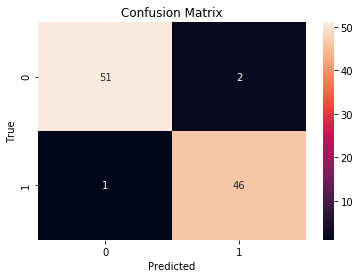

In [22]:
# idea from https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/48018785
import seaborn as sn

import matplotlib.pyplot as plt     
ax = plt.subplot()
sn.heatmap(confusion_matrix, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')

## Model Interpretability and Explainability

Microsoft has [six guiding AI principles](https://blogs.partner.microsoft.com/mpn/shared-responsibility-ai-2/). One of these is transparency, which states that it must be possible to understand how AI decisions were made. This is where [model interpretability](https://docs.microsoft.com/en-us/azure/machine-learning/service/machine-learning-interpretability-explainability) comes into play. Here we will use a TabularExplainer to understand global behavior of our model. 

In [23]:
## Note, explainer doesn't work if preprocessing was used because, input column names cannot be
# found in fitted columns!?

from azureml.explain.model.tabular_explainer import TabularExplainer
# "features" and "classes" fields are optional. couldn't figure out how to use them
explainer = TabularExplainer(fitted_model, X_train)


In [24]:
# Now run the explainer. This takes some time...
global_explanation = explainer.explain_global(X_train)

A Jupyter Widget

In [34]:
print("Top 10 features")
print("\n".join(sorted_global_importance_names[:10]))


Top 10 features
site-75
site-5
Gender
site-80
site-83
site-57
site-42
site-52
site-77
site-22
